### Fill out:
Name & Surname: Chow Chun Kei

Student ID: 33520771

## W9&W10 post studio exercises (Logistic regression, Decision trees)

Enter your solution in the cell(s) below each exercise. Add couple of inline comments explaining your code. Don't forget to add comments in markdown cell after each exercise. Missing comments (in markdown cells and/or inline) and late submissions will incur penalties.

Once done, drag&drop your python file to your ADS1002-name github account.

Copy url of this file on github to appropriate folder on Moodle by 09.30am prior your next studio. 

Solutions will be released later in the semester.

Max 10 marks - 2.5 marks per each exercise.

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Exercises (Logistic regression)

In this exercise you are going to construct a simple one vs rest multiclass classifier based on the probabilities for each of the binary problems for the three iris species. A one-vs-rest classification scheme constructs multiple models (one for each class) where each model predicts a binary classification and combines the results to come up with a single prediction.

For this problem, only use the first two features, i.e., `sepal length` and `sepal width` (don't standardise/normalise/etc). 

The steps for this multiclass classifier are:

* Exercise 1: 
    * Create a new features dataframe which contains only the first two columns of the iris data frame. 
    * For each of the iris categories, i.e., species_setosa, species_versicolor, and species_virginica, model the data using Logistic Regression and calculate the probabilities for the testing set of the category being correct. Store these probabilites in an array (or dataframe). For each category you will need to re-do the train-test split, but make sure you use the same random state (random state 1). Alternatively, split the data set initially with all three labels, and then work on each category. The necessary one-hot encoding has already been performed.
    * **Settings:**
        * 80/20 train-test-split with random state = 1
        * **LogisticRegression()** (meaning default solver and penalty applies)
    * **Output:** Show first 5 (rows of) probabilities for all (3) species.
* Exercise 2: 
    * For each instance in feature space (testing set), choose the category with the highest probability. The function `numpy.argmax()` will be useful.     
    * **Output:** Show first 5 entries for sepal_length, sepal_width, max probability and predicted class.
    * **Output:** Plot the final classification for the testing set in feature space, with colours based on the predicted category.
    
**Exercises 1 - 2** below correspond to the two points outlined above.

Q: After completing the code below and inspecting the results, comment on which class(es) appear most difficult to predict accurately. Can you suggest any improvements to the model which might result in better accuracy?

In [3]:
iris = sns.load_dataset('iris') # load the dataset from seaborn

species_one_hots =  pd.get_dummies(iris.species, prefix = 'species')
iris = pd.concat([iris, species_one_hots], axis = 1)

### Exercise 1

<hr>

**Solution:**

In [21]:
# create a new features dataframe containing first two columns of iris data frame
feature_df = iris[['sepal_length','sepal_width']]


# split the data separately for each species category
X_train, X_test, y_train_setosa, y_test_setosa = train_test_split(feature_df, iris['species_setosa'], test_size=0.2, random_state=1)
X_train2, X_test2, y_train_versicolor, y_test_versicolor = train_test_split(feature_df, iris['species_versicolor'], test_size=0.2, random_state=1)
X_train3, X_test3, y_train_virginica, y_test_virginica = train_test_split(feature_df, iris['species_virginica'], test_size=0.2, random_state=1)

# Logistic regression models
model_setosa = LogisticRegression(random_state=1)
model_versicolor = LogisticRegression(random_state=1)
model_virginica = LogisticRegression(random_state=1)

# Fit model
model_setosa.fit(X_train, y_train_setosa)
model_versicolor.fit(X_train2, y_train_versicolor)
model_virginica.fit(X_train3, y_train_virginica)

# Make predictions and calculate the probabilities for the test features

setosa_pred = model_setosa.predict_proba(X_test) 
versicolor_pred = model_versicolor.predict_proba(X_test2) 
virginica_pred = model_virginica.predict_proba(X_test3) 

# print out the probability table with a header
print('Probability DataFrame for testing set is:')

probs = pd.DataFrame({
    'setosa probability': setosa_pred[:, 1],
    'versicolor probability': versicolor_pred[:, 1],
    'virginica probability': virginica_pred[:, 1]
}
)

# show the first 5 rows probability of all species
probs.head()



Probability DataFrame for testing set is:


,setosa probability,versicolor probability,virginica probability
0,0.742548,0.040606,0.225705
1,0.302856,0.519703,0.099345
2,0.013190,0.307883,0.678467
3,0.888961,0.047439,0.116048
4,0.001808,0.083281,0.960347


### Exercise 2

<hr>

**Solution:**

In [27]:
# Predict the class with the highest probability
predicted_classes = np.argmax(probs.values, axis=1)

# Mapping of predicted class
species_mapping = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
predicted_species = [species_mapping[pred] for pred in predicted_classes]

# Show first 5 entries of sepal_length, sepal_width, max probability, and predicted class
X_test['predicted_species'] = predicted_species
X_test['max_probability'] = np.max(probs.values, axis=1)
iris_df = X_test[['sepal_length', 'sepal_width', 'max_probability', 'predicted_species']]
iris_df.head()




,sepal_length,sepal_width,max_probability,predicted_species
14,5.8,4.0,0.742548,setosa
98,5.1,2.5,0.519703,versicolor
75,6.6,3.0,0.678467,virginica
16,5.4,3.9,0.888961,setosa
131,7.9,3.8,0.960347,virginica


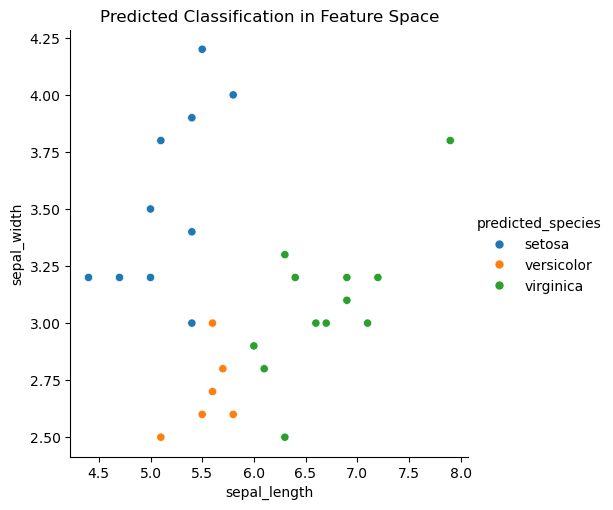

In [40]:
# plot the final classfication of feature space
sns.relplot(x="sepal_length", y="sepal_width",hue='predicted_species',data=iris_df)
plt.title('Predicted Classification in Feature Space');

<hr>

**Comments on Model Accuracy and Improvements**

- It is found that the species **versicolor** and **virginica** is the hardest to predict. This is because these two species has some **overlap** in the feature space (which is sepal width and sepal length)
- Based on the scatter plot above, we can also observe that species **setosa** is obviously separable while **versicolor** and **virginica**  tends to overlap which each other
- One improvement on the model is to **include more feature in the feature space**. Adding more feature variable can help to distinguish between versicolor and virginica better.
- Another method is by regularization where we tune the *regularization strength** in the Logistic Regression can help to improve the model accuracy.

<hr>

## Exercises (Decision trees)

For these exercises we will model a dataset of the properties of wheat seeds, which you can download from GitLab: 

[seeds_dataset](https://gitlab.erc.monash.edu.au/bads/data-challenges-resources/-/blob/main/Machine-Learning/Supervised-Methods/Decision-Trees/seeds_dataset.csv)

This is originally from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/seeds). The seedtype is an integer (1, 2, or 3) corresponding to the three classes `Kama`, `Rosa` and `Canadian` in the classes list below.

Run all the cells below before writing your solutions; don't standardise/normalise/etc.

In [42]:
seeds = pd.read_csv('seeds_dataset.csv', header=None, 
                   names=['area','perimeter','compactness','length','width','asymmetry',
                         'groovelength','seedtype'])
classes = ['Kama', 'Rosa', 'Canadian']

In [43]:
seeds.head()

,area,perimeter,compactness,length,width,asymmetry,groovelength,seedtype
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


Split the data into features and labels, and into a training and testing set.

In [48]:
X_ex = seeds.drop('seedtype', axis = 1)
y_ex = seeds['seedtype']

X_train, X_test, y_train, y_test = train_test_split(
    X_ex, y_ex, random_state = 42
)

### Exercise 3

Create a simple Decision Tree of maximum depth=3 and fit the training data to this model.

**Settings for decision tree:**

* random state 42
* max depth 3

Plot the decision tree for this model, and identify the most significant features for the classification of this dataset.

<hr>

**Solution:**

In [49]:
# instantiate and fit decition tree model
dt_model = DecisionTreeClassifier(max_depth= 3, random_state=42)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

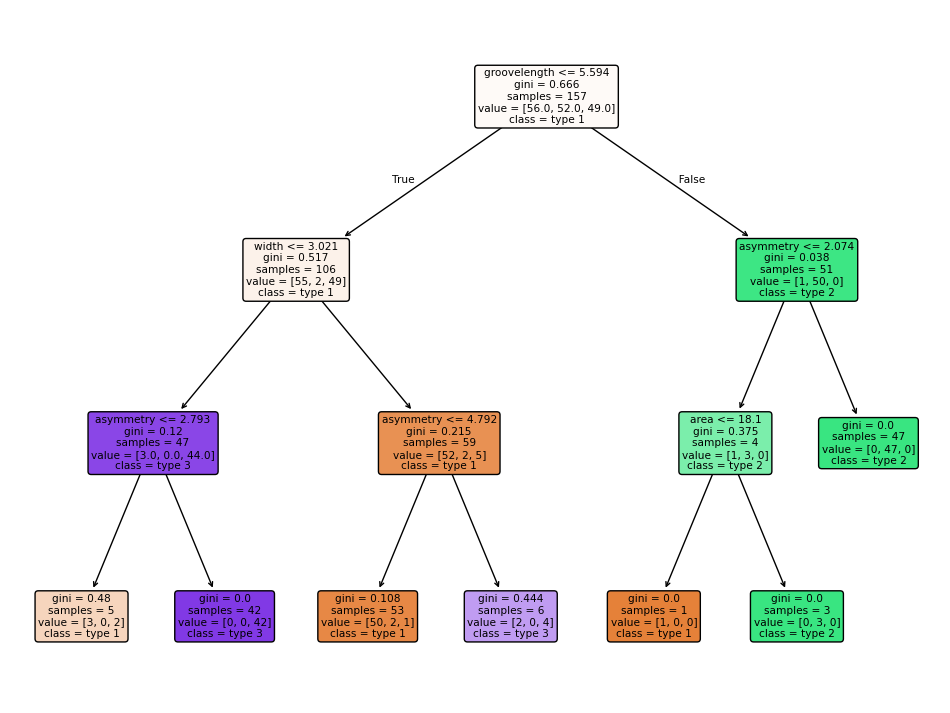

In [53]:
fig, ax = plt.subplots(figsize=(12,9)) # initialise the plots and axes
# plot the decision tree for the model df_dtc
plot_tree(dt_model, 
 filled = True, # colour the nodes according to the classifaction
 rounded = True, # make the nodes have rounded corners
 class_names = ['type 1', 'type 2','type 3'], # use these names for targets
 feature_names = X_ex.columns # use these names for features
 );

**Analysis:**
- The most important feature seems to be **groovelength**.
- The reason is because groovelength is the root node. This means that groovelength is the first and most important feature to divide the dataset into two branches to classify the seed type.
<hr>

### Exercise 4

Plot the confusion matrix for this model, and calculate the accuracy.

Decision Tree Accuracy: 0.887
              precision    recall  f1-score   support

           1       0.75      0.86      0.80        14
           2       1.00      0.94      0.97        18
           3       0.90      0.86      0.88        21

    accuracy                           0.89        53
   macro avg       0.88      0.89      0.88        53
weighted avg       0.89      0.89      0.89        53



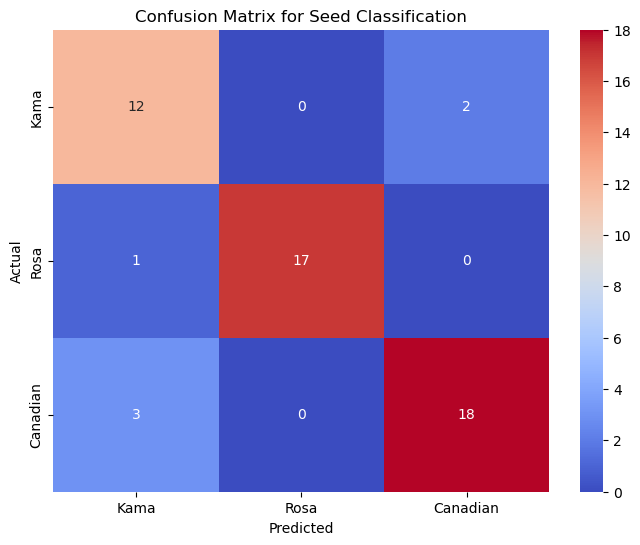

In [62]:
# Make predictions
Y_pred = dt_model.predict(X_test) 

# plot the confusion matrix for the test and predicted target values
cm = confusion_matrix(y_test, Y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', 
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Seed Classification');

# calculate and print the accuracy score
print(f'Decision Tree Accuracy: {accuracy_score(y_test, Y_pred):.3f}')

# Also see other metrics for the classfication
print(classification_report(y_test, Y_pred))
